# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

1)

In [ ]:
a = torch.randn((3,4)).uniform_(0, 1) # Равномерно U[0, 1]
a.shape

torch.Size([3, 4])

In [ ]:
b = torch.randn(12).normal_(mean=0, std=1) # Нормальное со средним 0 и дисперсией 1
b.shape

torch.Size([12])

2)

In [ ]:
c = b.view(2, 2, 3)
c.shape

torch.Size([2, 2, 3])

3)

In [ ]:
[row[0].item() for row in a]

[0.8692784905433655, 0.18888121843338013, 0.37925535440444946]

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

1)

In [ ]:
a_2 = torch.FloatTensor([
                         [1.1, 2.2],
                         [3, 4],
                         [5, 6],
                         [7, 8],
                         [9, 10]
])
b_2 = torch.FloatTensor([-1.1, -2.2, -3, -4, -5, -6, -7, -8, -9, -10])

2) 

In [ ]:
c_2 = b_2.view(5, 2)
c_2

tensor([[ -1.1000,  -2.2000],
        [ -3.0000,  -4.0000],
        [ -5.0000,  -6.0000],
        [ -7.0000,  -8.0000],
        [ -9.0000, -10.0000]])

3)

| операция | аналоги |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

Сложение

In [ ]:
print(a_2, '\n', c_2)

tensor([[ 1.1000,  2.2000],
        [ 3.0000,  4.0000],
        [ 5.0000,  6.0000],
        [ 7.0000,  8.0000],
        [ 9.0000, 10.0000]]) 
 tensor([[ -1.1000,  -2.2000],
        [ -3.0000,  -4.0000],
        [ -5.0000,  -6.0000],
        [ -7.0000,  -8.0000],
        [ -9.0000, -10.0000]])


In [ ]:
a_2 + c_2

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [ ]:
a_2.add(c_2)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

Вычитание

In [ ]:
a_2 - c_2

tensor([[ 2.2000,  4.4000],
        [ 6.0000,  8.0000],
        [10.0000, 12.0000],
        [14.0000, 16.0000],
        [18.0000, 20.0000]])

In [ ]:
a_2.sub(c_2) # copy (don't change a_2)
# a_2.sub_(c_2) # inpalce (change a_2)

tensor([[ 2.2000,  4.4000],
        [ 6.0000,  8.0000],
        [10.0000, 12.0000],
        [14.0000, 16.0000],
        [18.0000, 20.0000]])

Умножение (поэлементное)

In [ ]:
a_2 * c_2

tensor([[  -1.2100,   -4.8400],
        [  -9.0000,  -16.0000],
        [ -25.0000,  -36.0000],
        [ -49.0000,  -64.0000],
        [ -81.0000, -100.0000]])

In [ ]:
a_2.mul(c_2)

tensor([[  -1.2100,   -4.8400],
        [  -9.0000,  -16.0000],
        [ -25.0000,  -36.0000],
        [ -49.0000,  -64.0000],
        [ -81.0000, -100.0000]])

Деление (поэлементное)

In [ ]:
a_2 / c_2

tensor([[-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.]])

In [ ]:
a_2.div(c_2)

tensor([[-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.]])

### Задача 3

In [ ]:
a_2

tensor([[ 1.1000,  2.2000],
        [ 3.0000,  4.0000],
        [ 5.0000,  6.0000],
        [ 7.0000,  8.0000],
        [ 9.0000, 10.0000]])

In [ ]:
a_2[0] = 0
a_2

tensor([[ 0.,  0.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

1)

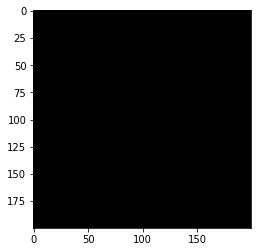

In [ ]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

plt.imshow(images[0])

2)

In [ ]:
for i in range(images.shape[0]):
  images[i][i * 2] = images[i][i * 2 + 1] = 255

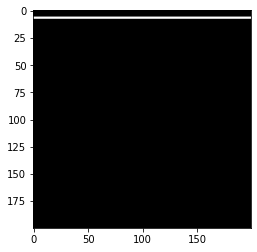

In [ ]:
plt.imshow(images[3])

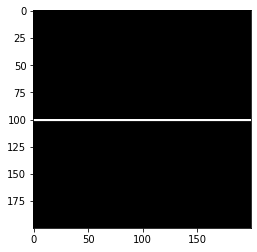

In [ ]:
plt.imshow(images[50])

3)

In [ ]:
value = (images.float()[1].mean() * 70).item()
value

178.5

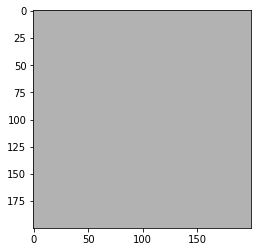

In [ ]:
tmp_images = images.clone()
tmp_images[0] = value

gray_image = tmp_images[0]
plt.imshow(gray_image)

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

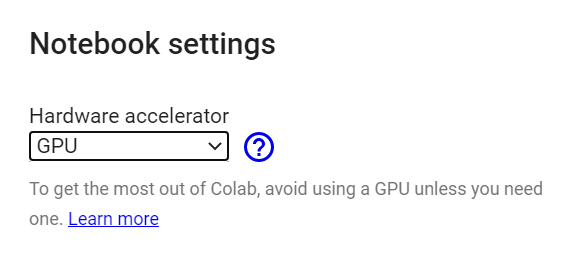

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
a_4 = torch.FloatTensor(2, 3, 4).uniform_().to(device)
b_4 = torch.FloatTensor(1, 8, 3).uniform_().to(device)

In [ ]:
a_4

tensor([[[0.1890, 0.7557, 0.1512, 0.9037],
         [0.4551, 0.5000, 0.3980, 0.0152],
         [0.0719, 0.1793, 0.1526, 0.3196]],

        [[0.2750, 0.4421, 0.2204, 0.4737],
         [0.8885, 0.0817, 0.1352, 0.4532],
         [0.7957, 0.8404, 0.1667, 0.6726]]], device='cuda:0')

In [ ]:
c_4 = b_4.view(a_4.shape)
c_4.shape

torch.Size([2, 3, 4])

In [ ]:
a_4 = a_4.to('cpu')
c_4 = c_4.to('cpu')

In [ ]:
a_4 = Variable(a_4, requires_grad=True)
c_4 = Variable(c_4, requires_grad=True)

In [ ]:
L = torch.mean((c_4 - a_4) ** 2)
L.backward()

In [ ]:
c_4.grad

tensor([[[ 0.0632, -0.0322,  0.0439, -0.0170],
         [-0.0107, -0.0392, -0.0253,  0.0408],
         [ 0.0623,  0.0020,  0.0153,  0.0492]],

        [[ 0.0144, -0.0228, -0.0049, -0.0194],
         [-0.0063,  0.0269,  0.0214,  0.0412],
         [-0.0450,  0.0077,  0.0615, -0.0429]]])